In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from  sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense 

from google.colab import files

from sklearn import preprocessing

In [0]:

!ls

'dataset23 (1).csv'   dataset23.csv   sample_data


In [0]:
files.upload()

{}

In [0]:
data_set = pd.read_csv('dataset23.csv')

In [0]:
data_set.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


'WHOIS_REGDATE' AND 'WHOIS_UPDATED_DATE' 

I dropped because it doesnt make a lot of impact to the target.
It actually doesnt matter because it all the datapoints have the same time of attack...

In [0]:
data =  data_set.drop(['Type','WHOIS_REGDATE','WHOIS_UPDATED_DATE'], axis = 1)

In [0]:
target = data_set['Type']

In [0]:
url_length =len(data['URL'])

for i in range(url_length):
  data['URL'][i] = data['URL'][i][0:2]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [0]:
data.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,M0,16,7,iso-8859-1,nginx,263.0,None,None,7,0,2,700,9,10,1153,832,9,2.0
1,B0,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,17,7,4,1230,17,19,1265,1230,17,0.0
2,B0,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,0,0,0,0,0,0,0,0,0,0.0
3,B0,17,6,ISO-8859-1,nginx,162.0,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0
4,B0,17,6,UTF-8,None,124140.0,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0
5,B0,18,7,UTF-8,nginx,NaN,SC,Mahe,11,6,9,894,11,13,838,894,11,0.0
6,B0,18,6,iso-8859-1,Apache/2,345.0,US,CO,12,0,3,1189,14,13,8559,1327,14,2.0
7,B0,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,0,0,0,0,0,0,0,0,0,0.0
8,M2,20,5,utf-8,nginx/1.10.1,NaN,None,None,0,0,0,0,2,3,213,146,2,2.0
9,M3,20,5,utf-8,nginx/1.10.1,NaN,None,None,0,0,0,0,2,1,62,146,2,2.0


In [0]:
data.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
dtype: int64

In [0]:
# d = data['CONTENT_LENGTH']
# mean_value = d.mean(axis = 0)
# data['CONTENT_LENGTH'].fillna(value= mean_value ,inplace=True)

In [0]:
data = data.drop(['CONTENT_LENGTH'],axis=1)

In [0]:
data.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,M0,16,7,iso-8859-1,nginx,None,None,7,0,2,700,9,10,1153,832,9,2.0
1,B0,16,6,UTF-8,Apache/2.4.10,None,None,17,7,4,1230,17,19,1265,1230,17,0.0
2,B0,16,6,us-ascii,Microsoft-HTTPAPI/2.0,None,None,0,0,0,0,0,0,0,0,0,0.0
3,B0,17,6,ISO-8859-1,nginx,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0
4,B0,17,6,UTF-8,None,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0
5,B0,18,7,UTF-8,nginx,SC,Mahe,11,6,9,894,11,13,838,894,11,0.0
6,B0,18,6,iso-8859-1,Apache/2,US,CO,12,0,3,1189,14,13,8559,1327,14,2.0
7,B0,19,6,us-ascii,Microsoft-HTTPAPI/2.0,US,FL,0,0,0,0,0,0,0,0,0,0.0
8,M2,20,5,utf-8,nginx/1.10.1,None,None,0,0,0,0,2,3,213,146,2,2.0
9,M3,20,5,utf-8,nginx/1.10.1,None,None,0,0,0,0,2,1,62,146,2,2.0


In [0]:
data['CHARSET'] = data['CHARSET'].astype('str')


In [0]:
url_length = len(data['CHARSET'])
for i in range(url_length):
  data['CHARSET'][i] = data['CHARSET'][i].upper()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
d = data['DNS_QUERY_TIMES']
mean_value = d.mean(axis = 0)
data['DNS_QUERY_TIMES'].fillna(value= mean_value ,inplace=True)

In [0]:
data.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,M0,16,7,ISO-8859-1,nginx,None,None,7,0,2,700,9,10,1153,832,9,2.0
1,B0,16,6,UTF-8,Apache/2.4.10,None,None,17,7,4,1230,17,19,1265,1230,17,0.0
2,B0,16,6,US-ASCII,Microsoft-HTTPAPI/2.0,None,None,0,0,0,0,0,0,0,0,0,0.0
3,B0,17,6,ISO-8859-1,nginx,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0
4,B0,17,6,UTF-8,None,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0
5,B0,18,7,UTF-8,nginx,SC,Mahe,11,6,9,894,11,13,838,894,11,0.0
6,B0,18,6,ISO-8859-1,Apache/2,US,CO,12,0,3,1189,14,13,8559,1327,14,2.0
7,B0,19,6,US-ASCII,Microsoft-HTTPAPI/2.0,US,FL,0,0,0,0,0,0,0,0,0,0.0
8,M2,20,5,UTF-8,nginx/1.10.1,None,None,0,0,0,0,2,3,213,146,2,2.0
9,M3,20,5,UTF-8,nginx/1.10.1,None,None,0,0,0,0,2,1,62,146,2,2.0


In [0]:
le=preprocessing.LabelEncoder()

In [0]:
data['URL'] = le.fit_transform(data['URL'])

In [0]:
data.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,1,16,7,ISO-8859-1,nginx,None,None,7,0,2,700,9,10,1153,832,9,2.0
1,0,16,6,UTF-8,Apache/2.4.10,None,None,17,7,4,1230,17,19,1265,1230,17,0.0
2,0,16,6,US-ASCII,Microsoft-HTTPAPI/2.0,None,None,0,0,0,0,0,0,0,0,0,0.0
3,0,17,6,ISO-8859-1,nginx,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0
4,0,17,6,UTF-8,None,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0
5,0,18,7,UTF-8,nginx,SC,Mahe,11,6,9,894,11,13,838,894,11,0.0
6,0,18,6,ISO-8859-1,Apache/2,US,CO,12,0,3,1189,14,13,8559,1327,14,2.0
7,0,19,6,US-ASCII,Microsoft-HTTPAPI/2.0,US,FL,0,0,0,0,0,0,0,0,0,0.0
8,3,20,5,UTF-8,nginx/1.10.1,None,None,0,0,0,0,2,3,213,146,2,2.0
9,4,20,5,UTF-8,nginx/1.10.1,None,None,0,0,0,0,2,1,62,146,2,2.0


In [0]:
data['CHARSET']=le.fit_transform(data['CHARSET'])

In [0]:
data.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,1,16,7,1,nginx,None,None,7,0,2,700,9,10,1153,832,9,2.0
1,0,16,6,4,Apache/2.4.10,None,None,17,7,4,1230,17,19,1265,1230,17,0.0
2,0,16,6,3,Microsoft-HTTPAPI/2.0,None,None,0,0,0,0,0,0,0,0,0,0.0
3,0,17,6,1,nginx,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0
4,0,17,6,4,None,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0


In [0]:
le.fit(data['WHOIS_COUNTRY'])
data['WHOIS_COUNTRY']=le.transform(data['WHOIS_COUNTRY'])

In [0]:
data.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,1,16,7,1,nginx,29,None,7,0,2,700,9,10,1153,832,9,2.0
1,0,16,6,4,Apache/2.4.10,29,None,17,7,4,1230,17,19,1265,1230,17,0.0
2,0,16,6,3,Microsoft-HTTPAPI/2.0,29,None,0,0,0,0,0,0,0,0,0,0.0
3,0,17,6,1,nginx,42,AK,31,22,3,3812,39,37,18784,4380,39,8.0
4,0,17,6,4,None,42,TX,57,2,5,4278,61,62,129889,4586,61,4.0


In [0]:
le.fit(data['WHOIS_STATEPRO'])
data['WHOIS_STATEPRO']=le.transform(data['WHOIS_STATEPRO'])

In [0]:
data.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,1,16,7,1,nginx,29,98,7,0,2,700,9,10,1153,832,9,2.0
1,0,16,6,4,Apache/2.4.10,29,98,17,7,4,1230,17,19,1265,1230,17,0.0
2,0,16,6,3,Microsoft-HTTPAPI/2.0,29,98,0,0,0,0,0,0,0,0,0,0.0
3,0,17,6,1,nginx,42,4,31,22,3,3812,39,37,18784,4380,39,8.0
4,0,17,6,4,None,42,137,57,2,5,4278,61,62,129889,4586,61,4.0


In [0]:
data['SERVER'] = data['SERVER'].astype('str')

In [0]:
data.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,1,16,7,1,nginx,29,98,7,0,2,700,9,10,1153,832,9,2.0
1,0,16,6,4,Apache/2.4.10,29,98,17,7,4,1230,17,19,1265,1230,17,0.0
2,0,16,6,3,Microsoft-HTTPAPI/2.0,29,98,0,0,0,0,0,0,0,0,0,0.0
3,0,17,6,1,nginx,42,4,31,22,3,3812,39,37,18784,4380,39,8.0
4,0,17,6,4,None,42,137,57,2,5,4278,61,62,129889,4586,61,4.0


In [0]:
le.fit(data['SERVER'])
data['SERVER']=le.transform(data['SERVER'])

In [0]:
type(data['WHOIS_COUNTRY'][1])

numpy.int64

In [0]:
target = target.ravel()

In [0]:
dataframe = data.drop(['WHOIS_COUNTRY','WHOIS_STATEPRO','TCP_CONVERSATION_EXCHANGE','APP_BYTES','SOURCE_APP_BYTES','REMOTE_APP_BYTES','APP_PACKETS'],axis=1)

In [0]:
final_data = np.array(dataframe)
target = np.array(target)

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(final_data, target, test_size = 0.2)

In [0]:
model = Sequential([
    Dense(32, activation='sigmoid', input_shape=(xtrain[1].shape)), 
    Dense(2, activation = 'softmax')
]) 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_62 (Dense)             (None, 2)                 66        
Total params: 418
Trainable params: 418
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'Adam',
             metrics = ['accuracy'])

In [0]:
ytrain = ytrain.reshape(len(ytrain), 1)

In [0]:
history = model.fit(xtrain, ytrain, epochs=30, verbose = 1)

Epoch 1/30
1424/1424 [==============================] - 1s 887us/step - loss: 0.4226 - acc: 0.8581
Epoch 2/30
1424/1424 [==============================] - 0s 116us/step - loss: 0.3469 - acc: 0.8722
Epoch 3/30
1424/1424 [==============================] - 0s 129us/step - loss: 0.3353 - acc: 0.8722
Epoch 4/30
1424/1424 [==============================] - 0s 122us/step - loss: 0.3154 - acc: 0.8722
Epoch 5/30
1424/1424 [==============================] - 0s 123us/step - loss: 0.2865 - acc: 0.8722
Epoch 6/30
1424/1424 [==============================] - 0s 121us/step - loss: 0.2659 - acc: 0.8729
Epoch 7/30
1424/1424 [==============================] - 0s 117us/step - loss: 0.2497 - acc: 0.8848
Epoch 8/30
1424/1424 [==============================] - 0s 127us/step - loss: 0.2351 - acc: 0.8954
Epoch 9/30
1424/1424 [==============================] - 0s 127us/step - loss: 0.2203 - acc: 0.9143
Epoch 10/30
1424/1424 [==============================] - 0s 121us/step - loss: 0.2043 - acc: 0.9157
Epoch 11/

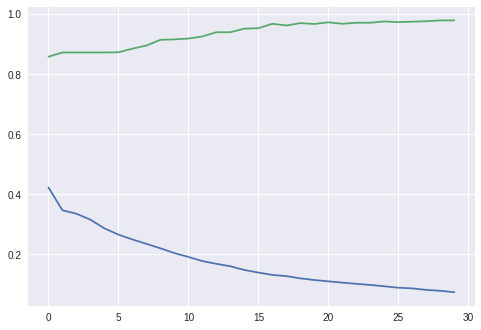

In [0]:
plt.plot(history.epoch, history.history['loss'],
        history.epoch, history.history['acc'])